# Tutorial: Model selection

This lab focuses on how to select the best model and implementing subset selection in R.

## Goals:
* Learn to use the `regsubsets` function

This lab draws from the practice sets at the end of Chapter 6 in James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). "An introduction to statistical learning: with applications in r." 

---
# Best subset selection

First we start with a tour of using the built-in functions for best subset selection. For this we will load the [Hitters (baseball) dataset](https://vincentarelbundock.github.io/Rdatasets/doc/ISLR/Hitters.html) included in ISLR.

In [ ]:
install.packages("ISLR") # uncomment if you don't have ISLR package installed
# Load the Baseball dataset
library(ISLR)
library(tidyverse) # for some data frame manipulation
names(Hitters)# 
dim(Hitters)

# Uncomment the line below to see the help function for the data set.
#help(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

[1] 263  20

One thing to notice is that this data set has a lot of missing values that are indicated as `na` in r. R includes a library of functions that are useful for dealing with missing data. 

In [ ]:
print(sum(is.na(Hitters)))
# R lets you filter out the empty values using na.omit

# Using na.omit to make a new data set that only includes
# those observations where all variables are observed
Hitters=na.omit(Hitters)

dim(Hitters) # Notice that the dimensions reduced by 59 rows
sum(is.na(Hitters)) # And there are no longer any "na" values

[1] 59


[1] 263  20

[1] 0

Now that we've cleaned the data set, let's work with best subset selection. We will perform subset selection using `regsubsets()`, which is part of the `leaps` package. 

In [ ]:
# Uncomment the line below if you haven't installed the leaps package yet
install.packages("leaps")
library(leaps)
?regsubsets # uncomment to learn more about regsubsets function

For this practice we will be using the [regsubsets function](https://www.rdocumentation.org/packages/leaps/versions/2.1-1/topics/regsubsets). The `regsubsets` function identifies the best model as a function of the number of predictors it has. Here, 'best' is quantified as adjusted $R^2$, Bayesian Information Criterion scores (BIC) or Mallow's Cp. 

Let's see which aspects of a hitter's performance best accounts for annual salary. To start, let's try just including four predictor variables. 

In [ ]:
# regsubsets uses the same model configuration as lm()
# so, configure the model in regsubsets as regsubsets(model, data)
regfit.full = regsubsets(Salary~., select(Hitters,c(AtBat,Hits,HmRun,Salary,Assists))) #use every variable EXCEPT salary as a predictor
summary(regfit.full) # Asterisks indicate that a field is included in the model

Subset selection object
Call: regsubsets.formula(Salary ~ ., select(Hitters, c(AtBat, Hits, 
    HmRun, Salary, Assists)))
4 Variables  (and intercept)
        Forced in Forced out
AtBat       FALSE      FALSE
Hits        FALSE      FALSE
HmRun       FALSE      FALSE
Assists     FALSE      FALSE
1 subsets of each size up to 4
Selection Algorithm: exhaustive
         AtBat Hits HmRun Assists
1  ( 1 ) " "   "*"  " "   " "    
2  ( 1 ) " "   "*"  "*"   " "    
3  ( 1 ) "*"   "*"  "*"   " "    
4  ( 1 ) "*"   "*"  "*"   "*"    

Because there were so few variables to worry about, the exhaustive algorithm was used. The table with asterisks and quotes shows the best model for each level of complexity. 

The asterisks indicate when a variable is included in the model. The way to interpret this summary is that each row indicates the variables to include with models of increasing complexity. The first row is a one-dimensional model (i.e., 1 variable, only includes `Hits`). The second row is a two-dimensional model and so on.

You may have also noticed the `Forced in` and `Forced out` columns. This reflects whether you have manually included or excluded variables in the subset selection. For example, if I excluded `AtBat`, then the `Forced out` colum for that variable would read `True`. I technically forced out most of the variables, but since that was done using `select()` instead of the `force.out` functionality of regsubsets, those variables aren't reported here. 

Now let's run `regsubsets()` again using all 19 variables (other than `Salary`, which is our outcome).

In [ ]:
regfit.full = regsubsets(Salary~., Hitters, nvmax=19) #< "nvmax" allows the model selection to include up to 19 variables (limited to 8 by default)
reg.summary = summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"  " "  

Once again, the exhaustive algorithm was used, and the best model for each level of complexity is shown above. To find which of these subsets is the best model we'll have to evaluate the bias-adjusted model fit measures (adjusting for complexity) that are output.

In [ ]:
# See what is included in the summary object
attributes(reg.summary)

$names
[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"   

$class
[1] "summary.regsubsets"

Instead of squinting at the asterisks table above, you can directly query which variables were included for each model using the `which` attribute.

In [ ]:
# You can directly query which terms are included at each level of complexity
reg.summary$which

,(Intercept),AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
4,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
5,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
6,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
7,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
8,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
9,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE
10,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE


Now let's look at the adjusted model fit for each of these models. Note that there are four different measures of model fit (RSS, Adjusted $R^2$, Mallow's Cp, BIC) included in the code below.

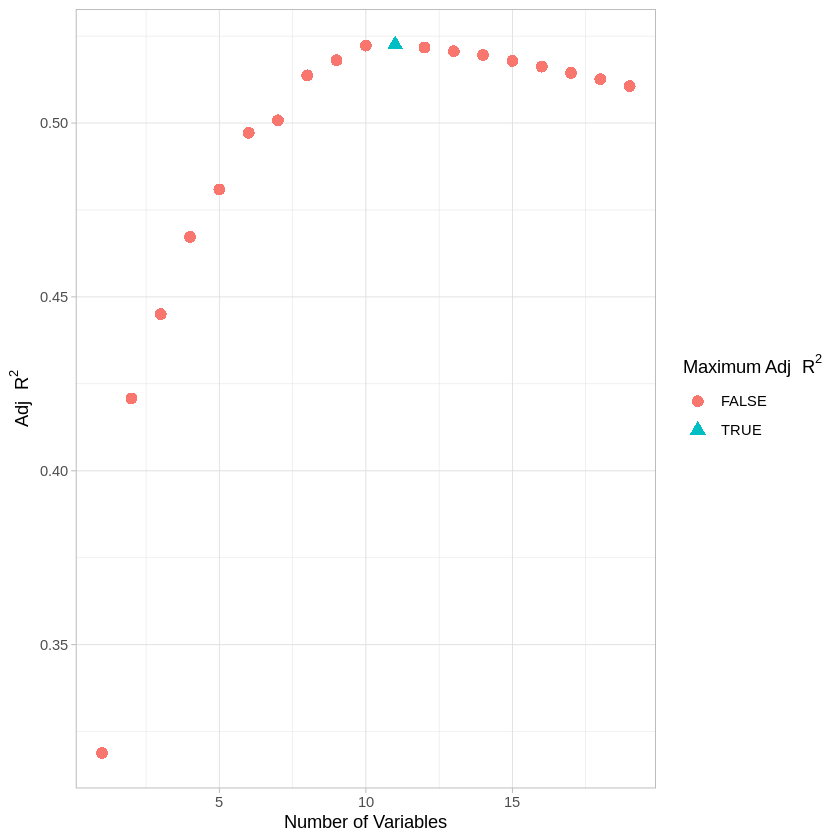

In [ ]:
# Uncomment the model fit measures you want to look at. 

numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence, from 1 to 19. 
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

# #rss
# rss.df <- data.frame(numvar = numvar, rss = reg.summary$rss, minrss = allfalse)
# rss.df$minrss[which.min(reg.summary$rss)] <- TRUE
# ggplot(rss.df,aes(x=numvar,y=rss,shape=minrss,col=minrss)) + 
#     geom_point(size=3) + theme_light() + 
#     labs(x = "Number of Variables", y = "RSS", color="Minimum RSS", shape="Minimum RSS")

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

# #mallow's cp
# cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
# cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
# ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
#     geom_point(size=3) + theme_light() + 
#     labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

# #bic
# bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
# bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
# ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
#     geom_point(size=3) + theme_light() + 
#     labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

You can also play around with some of the built-in plotting functions from `regsubset()` : 

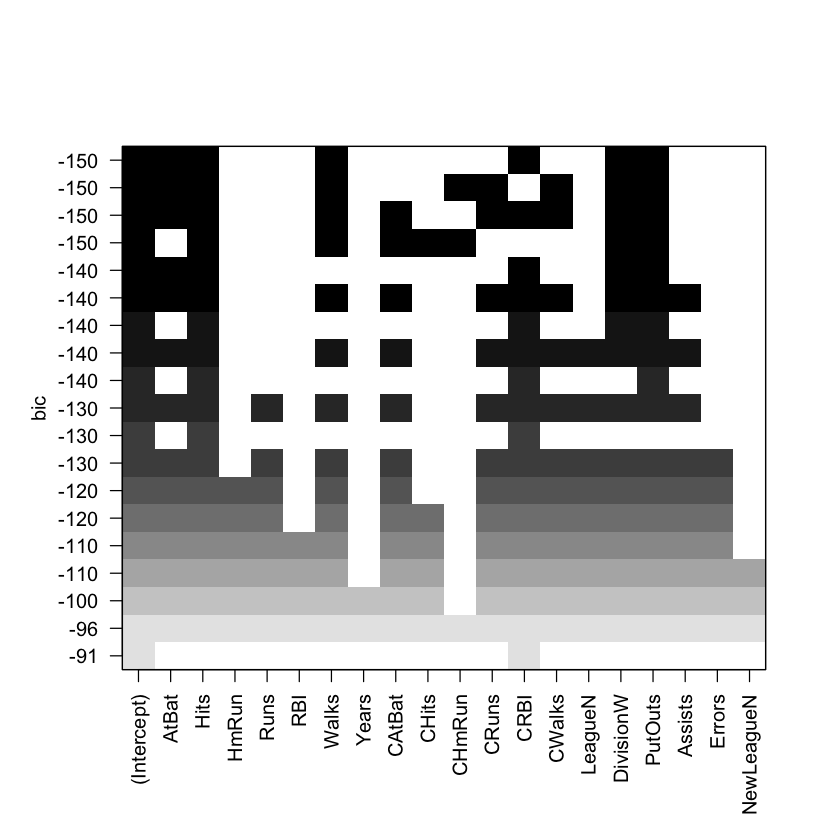

In [ ]:
plot(regfit.full, scale="bic") #BIC
# plot(regfit.full, scale="adjr2") #adjusted R^2
# plot(regfit.full, scale="Cp") #Mallow's Cp

In the plot above, each model is represented by a row. The models are sorted from those with the most negative BICs (at the top) to those with the least negative BICs (at the bottom). The variables included in each model are denoted by colored-in squares. 
We see that many models have a BIC of around −150. However, the model
with the lowest BIC (and thus the best one) contains only six variables: AtBat,
Hits, Walks, CRBI, DivisionW, and PutOuts. 

Below, we look at which model is "best" according to the various bias-adjusted metrics. 

In [ ]:
# identify which model has the best bias-adjusted fit
which.min(reg.summary$bic) 
which.max(reg.summary$adjr2)
which.min(reg.summary$cp)

[1] 6

[1] 11

[1] 10

Right now, there's a clear discrepancy in fit among the bias-adjusted model evaluations. How could we use cross-validation to help determine which model is best? (*Note: if you'd like to predict outputs from models in `regsubsets`, see pg 248-250 of the James textbook.*)

*Notebook authored by Ven Popov and edited by Krista Bond, Charles Wu, Patience Stevens, and Amy Sentis.*